# tile h03v03
## chip ch19cv18

# pyccd



In [1]:
from noteLib import *


In [2]:
h = 3
v = 3
ch = 19
cv = 18
m1 = display_tile_chip(h, v, ch, cv)


In [3]:
m1

In [4]:
from datetime import datetime

date_range = (
        datetime(2013,1,1),
        datetime(2018,9,30))

clear_list = dc_find_datasets(date_range=date_range)

Number of Pretty Scenes 24


In [5]:
measurements=['red','green','blue']

h=3
v=3
ch=19
vh=18

dc_xarray = dc_load_tile_chip(h,v,ch,cv,datasets=clear_list,measurements=measurements)

dc_xarray

<xarray.Dataset>
Dimensions:  (time: 24, x: 100, y: 100)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-03T18:58:01.903025 ... 2017-05-27T18:55:36.976949
  * y        (y) float64 2.811e+06 2.811e+06 2.811e+06 ... 2.808e+06 2.808e+06
  * x        (x) float64 -2.059e+06 -2.059e+06 ... -2.056e+06 -2.056e+06
Data variables:
    red      (time, y, x) int16 1517 1518 1483 1442 1219 ... 1935 2001 1743 1325
    green    (time, y, x) int16 1217 1227 1194 1169 1037 ... 1764 1808 1557 1170
    blue     (time, y, x) int16 879 887 878 834 700 ... 998 1445 1460 1256 976
Attributes:
    crs:      epsg:5072

True

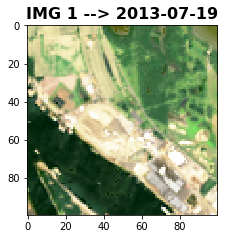

In [6]:
t=1
cnt=1
figsize=[3.5,3.5]
plot_labeled_rgb(dc_xarray, t, cnt, figsize=figsize)

In [7]:
measurements=['red','nir','swir1']

h=3
v=3
ch=19
vh=18

dataset = dc_load_tile_chip(h,v,ch,cv,datasets=clear_list,measurements=measurements)


# 24 observations this time

In [8]:
dataset

<xarray.Dataset>
Dimensions:  (time: 24, x: 100, y: 100)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-03T18:58:01.903025 ... 2017-05-27T18:55:36.976949
  * y        (y) float64 2.811e+06 2.811e+06 2.811e+06 ... 2.808e+06 2.808e+06
  * x        (x) float64 -2.059e+06 -2.059e+06 ... -2.056e+06 -2.056e+06
Data variables:
    red      (time, y, x) int16 1517 1518 1483 1442 1219 ... 1935 2001 1743 1325
    nir      (time, y, x) int16 2253 2234 2181 2186 2523 ... 1878 1989 1780 1362
    swir1    (time, y, x) int16 2760 2723 2680 2612 2485 ... 1767 1830 1762 1373
Attributes:
    crs:      epsg:5072

# NDVI

NDVI = (NIR — VIS)/(NIR + VIS)

Calculations of NDVI for a given pixel always result in a number that ranges from minus one (-1) to plus one (+1); however, no green leaves gives a value close to zero. A zero means no vegetation and close to +1 (0.8 - 0.9) indicates the highest possible density of green leaves. 

In [9]:
#Calculate NDVI
ndvi = (dataset.nir - dataset.red)/(dataset.nir + dataset.red)

In [10]:
from matplotlib import pyplot

In [11]:
import matplotlib
ndvi_cmap = matplotlib.colors.ListedColormap(['blue', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600'])
ndvi_bounds = [-1, 0, 0.1, 0.25, 0.35, 0.5, 0.8, 1]
ndvi_norm = matplotlib.colors.BoundaryNorm(ndvi_bounds,ndvi_cmap.N)

ntime = len(ndvi)
for itime in range(0,ntime):
    ary = ndvi[itime]
    print('Counter = %s %s' % (itime,dataset.time[itime].values))
    # pyplot.imshow(ary, cmap=ndvi_cmap, norm = ndvi_norm)
    # pyplot.colorbar()
    # pyplot.show()


Counter = 0 2013-07-03T18:58:01.903025000
Counter = 1 2013-07-19T18:58:00.778303000
Counter = 2 2013-08-04T18:58:03.637457000
Counter = 3 2013-08-20T18:58:04.882656000
Counter = 4 2013-10-23T18:57:49.896051000
Counter = 5 2013-11-24T18:57:38.942422000
Counter = 6 2014-07-06T18:55:52.703616000
Counter = 7 2014-08-07T18:56:04.670261000
Counter = 8 2014-08-23T18:56:07.778432000
Counter = 9 2014-11-11T18:56:17.032308000
Counter = 10 2015-04-20T18:55:25.143995000
Counter = 11 2015-06-07T18:55:15.831248000
Counter = 12 2015-06-23T18:55:22.285077000
Counter = 13 2015-07-09T18:55:32.978324000
Counter = 14 2015-08-26T18:55:50.421920000
Counter = 15 2015-09-27T18:56:03.350566000
Counter = 16 2016-01-01T18:56:09.197623000
Counter = 17 2016-06-25T18:55:50.785822000
Counter = 18 2016-07-27T18:56:03.411102000
Counter = 19 2016-08-12T18:56:05.497944000
Counter = 20 2016-08-28T18:56:12.977271000
Counter = 21 2016-09-13T18:56:16.788680000
Counter = 22 2017-01-03T18:56:15.308612000
Counter = 23 2017-05-

# can do any kind of band math for the entire array
# such as NDWI etc


In [12]:
ndwi = (dataset.nir - dataset.swir1)/(dataset.nir + dataset.swir1)

In [13]:
type(ary)

xarray.core.dataarray.DataArray

In [14]:
ary.shape

(100, 100)

In [15]:
type(ndvi)

xarray.core.dataarray.DataArray

In [16]:
ndvi.shape

(24, 100, 100)

In [17]:
ndwi.shape

(24, 100, 100)

# Time for some pyccd.

## Let's load the bands (measurements we need)
- this will take a little longer
- I run this on a tiny vm at home
- I also run this on small cloud instances - cloud is faster - because of network proximity

## 24 landsat 8 "pretty scenes"

In [18]:
Start = time.time()


In [19]:
measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']

h=3
v=3
ch=19
vh=18

the_xarray = dc_load_tile_chip(h,v,ch,cv,datasets=clear_list,measurements=measurements)

# The xarray is the most important portable construct/abstraction in ODC.

In [20]:
the_xarray

<xarray.Dataset>
Dimensions:   (time: 24, x: 100, y: 100)
Coordinates:
  * time      (time) datetime64[ns] 2013-07-03T18:58:01.903025 ... 2017-05-27T18:55:36.976949
  * y         (y) float64 2.811e+06 2.811e+06 2.811e+06 ... 2.808e+06 2.808e+06
  * x         (x) float64 -2.059e+06 -2.059e+06 ... -2.056e+06 -2.056e+06
Data variables:
    red       (time, y, x) int16 1517 1518 1483 1442 ... 1935 2001 1743 1325
    green     (time, y, x) int16 1217 1227 1194 1169 ... 1764 1808 1557 1170
    blue      (time, y, x) int16 879 887 878 834 700 ... 998 1445 1460 1256 976
    nir       (time, y, x) int16 2253 2234 2181 2186 ... 1878 1989 1780 1362
    swir1     (time, y, x) int16 2760 2723 2680 2612 ... 1767 1830 1762 1373
    swir2     (time, y, x) int16 2541 2504 2473 2376 ... 1494 1565 1548 1206
    pixel_qa  (time, y, x) int16 322 322 322 322 322 322 ... 322 322 322 322 322
Attributes:
    crs:      epsg:5072

In [21]:
End = time.time()
print ("Load time took seconds = ", End-Start)

Load time took seconds =  35.86636018753052


- place this get_color_params in a library Tony 

In [22]:
import ccd
import pandas as pd
def get_color_params(ds, inx, iny):
   
    landsat_dataset = ds
    myx = inx
    myy = iny

    myred = landsat_dataset.red[:, myy, myx].values

    myblue = landsat_dataset.blue[:, myy, myx].values

    mygreen = landsat_dataset.green[:, myy, myx].values
    mynir = landsat_dataset.nir[:, myy, myx].values
    myswir1 = landsat_dataset.swir1[:, myy, myx].values
    myswir2 = landsat_dataset.swir2[:, myy, myx].values
    mypixel_qa = landsat_dataset.pixel_qa[:, myy, myx].values

    # print (myred, mypixel_qa)
    dts = landsat_dataset.time.values
    scene_count = len(dts)
    mythermals = np.ones(scene_count) * (273.15) * 10
    
    ordinal_dates = []
    for mydate in dts:
        # print (mydate)
       # print(dir(mydate))
        dval = datetime.utcfromtimestamp(mydate.tolist()/1e9)
        # dval = mydate.value
        # print(dval)
        # print (type (dval))
        ordinal_dates.append(dval.toordinal())
        
    # print (ordinal_dates)
        
    # params = (dts, myblue, mygreen, myred, mynir, myswir1, myswir2, mythermals, mypixel_qa)
    params = (ordinal_dates, myblue, mygreen, myred, mynir, myswir1, myswir2, mythermals, mypixel_qa)

    mystery_object = ccd.detect(*params)

    # print(mystery_object)
    return mystery_object

## params = (ordinal_dates, myblue, mygreen, myred, mynir, myswir1, myswir2, mythermals, mypixel_qa)

In [23]:

Start = time.time()


In [24]:
# this should also be in ccd_helper.py
import numpy
width = 100
height = 100
water_array = numpy.zeros(shape = (width, height))
water_array2 = numpy.zeros(shape = (width, height))
for x in range(0,width):
    for y in range(0,height):
        mo = get_color_params(the_xarray,y,x) # (note the y,x for numpy array filling axis sanity)
        #print("MO=",mo)
        print(x,y,"water",mo['water_prob'])
        
        water_array[x,y] = mo['water_prob']
        #water_array2[xp,yp] = mo['water_prob']

        

0 0 water 0.0
0 1 water 0.0
0 2 water 0.0
0 3 water 0.0
0 4 water 0.0
0 5 water 0.0
0 6 water 0.0
0 7 water 0.0
0 8 water 0.0
0 9 water 0.0
0 10 water 0.0
0 11 water 0.0
0 12 water 0.0
0 13 water 0.0
0 14 water 0.0
0 15 water 0.0
0 16 water 0.0
0 17 water 0.0
0 18 water 0.0
0 19 water 0.0
0 20 water 0.0
0 21 water 0.0
0 22 water 0.0
0 23 water 0.0
0 24 water 0.0
0 25 water 0.0
0 26 water 0.0
0 27 water 0.0
0 28 water 0.0
0 29 water 0.0
0 30 water 0.0
0 31 water 0.0
0 32 water 0.0
0 33 water 0.0
0 34 water 0.0
0 35 water 0.0
0 36 water 0.0
0 37 water 0.0
0 38 water 0.0
0 39 water 0.0
0 40 water 0.0
0 41 water 0.0
0 42 water 0.0
0 43 water 0.1303780964797914
0 44 water 0.6953498478922208
0 45 water 0.8257279443720121
0 46 water 0.8257279443720121
0 47 water 0.8257279443720121
0 48 water 0.8691873098652759
0 49 water 0.9126466753585397
0 50 water 0.8691873098652759
0 51 water 0.9126466753585397
0 52 water 0.8691873098652759
0 53 water 0.2607561929595828
0 54 water 0.0
0 55 water 0.0
0 56 

4 34 water 0.0
4 35 water 0.0
4 36 water 0.0
4 37 water 0.0
4 38 water 0.0
4 39 water 0.0
4 40 water 0.0
4 41 water 0.0
4 42 water 0.0
4 43 water 0.0
4 44 water 0.0
4 45 water 0.0869187309865276
4 46 water 0.21729682746631898
4 47 water 0.651890482398957
4 48 water 0.7388092133854846
4 49 water 0.7388092133854846
4 50 water 0.7388092133854846
4 51 water 0.6953498478922208
4 52 water 0.5215123859191656
4 53 water 0.0
4 54 water 0.0
4 55 water 0.0
4 56 water 0.0
4 57 water 0.0
4 58 water 0.0
4 59 water 0.0
4 60 water 0.0
4 61 water 0.0
4 62 water 0.0
4 63 water 0.0
4 64 water 0.0
4 65 water 0.0
4 66 water 0.0
4 67 water 0.0
4 68 water 0.0
4 69 water 0.0869187309865276
4 70 water 0.39113428943937417
4 71 water 0.8257279443720121
4 72 water 0.1738374619730552
4 73 water 0.0
4 74 water 0.0
4 75 water 0.0
4 76 water 0.0
4 77 water 0.0
4 78 water 0.0
4 79 water 0.0
4 80 water 0.0
4 81 water 0.0
4 82 water 0.0
4 83 water 0.0
4 84 water 0.0
4 85 water 0.0
4 86 water 0.0
4 87 water 0.43459365493

8 99 water 0.9995654063450673
9 0 water 0.0
9 1 water 0.0
9 2 water 0.0
9 3 water 0.0
9 4 water 0.0
9 5 water 0.0
9 6 water 0.0
9 7 water 0.0
9 8 water 0.0
9 9 water 0.0
9 10 water 0.0
9 11 water 0.0
9 12 water 0.0
9 13 water 0.0
9 14 water 0.0
9 15 water 0.0
9 16 water 0.0
9 17 water 0.0
9 18 water 0.0
9 19 water 0.0
9 20 water 0.0
9 21 water 0.0
9 22 water 0.0
9 23 water 0.0
9 24 water 0.0
9 25 water 0.0
9 26 water 0.0
9 27 water 0.0
9 28 water 0.0
9 29 water 0.0
9 30 water 0.0
9 31 water 0.0
9 32 water 0.0
9 33 water 0.0
9 34 water 0.0
9 35 water 0.0
9 36 water 0.0
9 37 water 0.0
9 38 water 0.0
9 39 water 0.0
9 40 water 0.0
9 41 water 0.0
9 42 water 0.0
9 43 water 0.0
9 44 water 0.0
9 45 water 0.0
9 46 water 0.0
9 47 water 0.0
9 48 water 0.0
9 49 water 0.0
9 50 water 0.0
9 51 water 0.0
9 52 water 0.0
9 53 water 0.0
9 54 water 0.0
9 55 water 0.0
9 56 water 0.0
9 57 water 0.0
9 58 water 0.0
9 59 water 0.0
9 60 water 0.0
9 61 water 0.0
9 62 water 0.0
9 63 water 0.0
9 64 water 0.0
9 65 

13 74 water 0.0
13 75 water 0.0
13 76 water 0.0
13 77 water 0.0
13 78 water 0.0
13 79 water 0.0
13 80 water 0.0
13 81 water 0.0
13 82 water 0.0
13 83 water 0.0
13 84 water 0.0
13 85 water 0.0
13 86 water 0.0
13 87 water 0.0
13 88 water 0.0
13 89 water 0.0
13 90 water 0.0
13 91 water 0.0
13 92 water 0.0
13 93 water 0.0
13 94 water 0.0
13 95 water 0.0
13 96 water 0.0
13 97 water 0.0869187309865276
13 98 water 0.1738374619730552
13 99 water 0.2607561929595828
14 0 water 0.0
14 1 water 0.0
14 2 water 0.0
14 3 water 0.0
14 4 water 0.0
14 5 water 0.0
14 6 water 0.0
14 7 water 0.0
14 8 water 0.0
14 9 water 0.0
14 10 water 0.047596382674916705
14 11 water 0.0
14 12 water 0.0
14 13 water 0.0
14 14 water 0.0
14 15 water 0.045433893684688774
14 16 water 0.0
14 17 water 0.0
14 18 water 0.0
14 19 water 0.0
14 20 water 0.0
14 21 water 0.0
14 22 water 0.0
14 23 water 0.0
14 24 water 0.0
14 25 water 0.0
14 26 water 0.0
14 27 water 0.0
14 28 water 0.0
14 29 water 0.0
14 30 water 0.0
14 31 water 0.0
14 

18 75 water 0.0
18 76 water 0.0
18 77 water 0.0
18 78 water 0.0
18 79 water 0.0
18 80 water 0.0
18 81 water 0.0
18 82 water 0.0
18 83 water 0.0
18 84 water 0.0
18 85 water 0.0
18 86 water 0.0
18 87 water 0.0
18 88 water 0.0
18 89 water 0.0
18 90 water 0.09086778736937755
18 91 water 0.0
18 92 water 0.0
18 93 water 0.0
18 94 water 0.0
18 95 water 0.0
18 96 water 0.0
18 97 water 0.0
18 98 water 0.0
18 99 water 0.0
19 0 water 0.0
19 1 water 0.0
19 2 water 0.0
19 3 water 0.0
19 4 water 0.0
19 5 water 0.0
19 6 water 0.0
19 7 water 0.0
19 8 water 0.0
19 9 water 0.0
19 10 water 0.0
19 11 water 0.0
19 12 water 0.0
19 13 water 0.0
19 14 water 0.045433893684688774
19 15 water 0.0
19 16 water 0.0
19 17 water 0.0
19 18 water 0.0
19 19 water 0.0
19 20 water 0.0
19 21 water 0.0
19 22 water 0.0
19 23 water 0.0
19 24 water 0.0
19 25 water 0.0
19 26 water 0.0
19 27 water 0.0
19 28 water 0.0
19 29 water 0.0
19 30 water 0.0
19 31 water 0.0
19 32 water 0.0
19 33 water 0.0
19 34 water 0.0
19 35 water 0.0
1

23 63 water 0.0
23 64 water 0.0
23 65 water 0.0
23 66 water 0.0
23 67 water 0.0
23 68 water 0.0
23 69 water 0.0
23 70 water 0.0
23 71 water 0.0
23 72 water 0.0
23 73 water 0.0
23 74 water 0.0
23 75 water 0.0434593654932638
23 76 water 0.21729682746631898
23 77 water 0.2607561929595828
23 78 water 0.1738374619730552
23 79 water 0.0
23 80 water 0.0
23 81 water 0.0
23 82 water 0.0
23 83 water 0.0
23 84 water 0.0
23 85 water 0.0
23 86 water 0.0
23 87 water 0.0
23 88 water 0.0
23 89 water 0.0
23 90 water 0.0
23 91 water 0.0
23 92 water 0.0
23 93 water 0.0
23 94 water 0.0
23 95 water 0.0
23 96 water 0.0
23 97 water 0.0
23 98 water 0.0
23 99 water 0.0
24 0 water 0.0
24 1 water 0.0
24 2 water 0.0
24 3 water 0.0
24 4 water 0.0
24 5 water 0.0
24 6 water 0.0
24 7 water 0.0
24 8 water 0.0
24 9 water 0.0
24 10 water 0.0
24 11 water 0.0
24 12 water 0.0
24 13 water 0.0
24 14 water 0.0
24 15 water 0.0
24 16 water 0.0
24 17 water 0.0
24 18 water 0.0
24 19 water 0.045433893684688774
24 20 water 0.0
24 2

28 51 water 0.0
28 52 water 0.0
28 53 water 0.0
28 54 water 0.045433893684688774
28 55 water 0.045433893684688774
28 56 water 0.0
28 57 water 0.0
28 58 water 0.0
28 59 water 0.0
28 60 water 0.0
28 61 water 0.0
28 62 water 0.0
28 63 water 0.0
28 64 water 0.0
28 65 water 0.0
28 66 water 0.0
28 67 water 0.0
28 68 water 0.0
28 69 water 0.0
28 70 water 0.0
28 71 water 0.0
28 72 water 0.0
28 73 water 0.0
28 74 water 0.0
28 75 water 0.0
28 76 water 0.0
28 77 water 0.0
28 78 water 0.0
28 79 water 0.0
28 80 water 0.0
28 81 water 0.0
28 82 water 0.0
28 83 water 0.0
28 84 water 0.0
28 85 water 0.045433893684688774
28 86 water 0.0
28 87 water 0.045433893684688774
28 88 water 0.0
28 89 water 0.0
28 90 water 0.0
28 91 water 0.1303780964797914
28 92 water 0.0869187309865276
28 93 water 0.0869187309865276
28 94 water 0.0
28 95 water 0.0
28 96 water 0.0
28 97 water 0.0
28 98 water 0.0
28 99 water 0.0
29 0 water 0.39980009995002497
29 1 water 0.0
29 2 water 0.0
29 3 water 0.0
29 4 water 0.0
29 5 water 0

33 33 water 0.09519276534983341
33 34 water 0.0
33 35 water 0.0
33 36 water 0.0
33 37 water 0.0
33 38 water 0.0
33 39 water 0.0
33 40 water 0.0
33 41 water 0.0
33 42 water 0.0
33 43 water 0.0
33 44 water 0.0
33 45 water 0.0
33 46 water 0.0
33 47 water 0.0
33 48 water 0.0
33 49 water 0.0
33 50 water 0.0
33 51 water 0.0
33 52 water 0.0
33 53 water 0.0
33 54 water 0.0
33 55 water 0.0
33 56 water 0.0
33 57 water 0.0
33 58 water 0.0
33 59 water 0.0
33 60 water 0.0
33 61 water 0.0
33 62 water 0.0
33 63 water 0.0
33 64 water 0.0
33 65 water 0.0
33 66 water 0.0
33 67 water 0.0
33 68 water 0.0
33 69 water 0.0
33 70 water 0.0
33 71 water 0.0
33 72 water 0.0
33 73 water 0.0
33 74 water 0.0
33 75 water 0.0
33 76 water 0.0
33 77 water 0.0
33 78 water 0.0
33 79 water 0.0
33 80 water 0.0
33 81 water 0.0
33 82 water 0.0
33 83 water 0.0
33 84 water 0.0
33 85 water 0.0
33 86 water 0.0
33 87 water 0.0
33 88 water 0.1738374619730552
33 89 water 0.1738374619730552
33 90 water 0.1303780964797914
33 91 water

37 96 water 0.0
37 97 water 0.0
37 98 water 0.0
37 99 water 0.0
38 0 water 0.999545661063153
38 1 water 0.999545661063153
38 2 water 0.999545661063153
38 3 water 0.9541117673784643
38 4 water 0.8632439800090868
38 5 water 0.27260336210813263
38 6 water 0.0
38 7 water 0.0
38 8 water 0.0
38 9 water 0.0
38 10 water 0.0
38 11 water 0.0
38 12 water 0.0
38 13 water 0.0
38 14 water 0.0
38 15 water 0.8567348881485006
38 16 water 0.0
38 17 water 0.0
38 18 water 0.0
38 19 water 0.0
38 20 water 0.0
38 21 water 0.0
38 22 water 0.0
38 23 water 0.0
38 24 water 0.0
38 25 water 0.0
38 26 water 0.0
38 27 water 0.0
38 28 water 0.0434593654932638
38 29 water 0.0434593654932638
38 30 water 0.1738374619730552
38 31 water 0.0869187309865276
38 32 water 0.0
38 33 water 0.0
38 34 water 0.0
38 35 water 0.0
38 36 water 0.0
38 37 water 0.0
38 38 water 0.0
38 39 water 0.0
38 40 water 0.0
38 41 water 0.0
38 42 water 0.0
38 43 water 0.0
38 44 water 0.0
38 45 water 0.0
38 46 water 0.0
38 47 water 0.0
38 48 water 0.0

42 47 water 0.0
42 48 water 0.0
42 49 water 0.0
42 50 water 0.0
42 51 water 0.0
42 52 water 0.0
42 53 water 0.0
42 54 water 0.0
42 55 water 0.0
42 56 water 0.0
42 57 water 0.0
42 58 water 0.0
42 59 water 0.0
42 60 water 0.0
42 61 water 0.0
42 62 water 0.0
42 63 water 0.0
42 64 water 0.0
42 65 water 0.0
42 66 water 0.0
42 67 water 0.0
42 68 water 0.0
42 69 water 0.0
42 70 water 0.0
42 71 water 0.0
42 72 water 0.0
42 73 water 0.0
42 74 water 0.0
42 75 water 0.0
42 76 water 0.0
42 77 water 0.0
42 78 water 0.0
42 79 water 0.0
42 80 water 0.0
42 81 water 0.1738374619730552
42 82 water 0.0
42 83 water 0.0
42 84 water 0.0
42 85 water 0.0
42 86 water 0.0
42 87 water 0.0
42 88 water 0.09086778736937755
42 89 water 0.09086778736937755
42 90 water 0.0
42 91 water 0.0
42 92 water 0.0
42 93 water 0.0
42 94 water 0.0
42 95 water 0.0434593654932638
42 96 water 0.0
42 97 water 0.0
42 98 water 0.0
42 99 water 0.0
43 0 water 0.9995654063450673
43 1 water 0.9995654063450673
43 2 water 0.9995654063450673


46 84 water 0.0
46 85 water 0.0
46 86 water 0.0
46 87 water 0.0
46 88 water 0.0
46 89 water 0.0
46 90 water 0.0
46 91 water 0.0
46 92 water 0.0
46 93 water 0.0
46 94 water 0.045433893684688774
46 95 water 0.3042155584528466
46 96 water 0.0434593654932638
46 97 water 0.0
46 98 water 0.0
46 99 water 0.0
47 0 water 0.9995654063450673
47 1 water 0.9995654063450673
47 2 water 0.9995654063450673
47 3 water 0.9995654063450673
47 4 water 0.9995654063450673
47 5 water 0.9995654063450673
47 6 water 0.9995654063450673
47 7 water 0.9995002498750624
47 8 water 0.9995002498750624
47 9 water 0.8416622830089426
47 10 water 0.5260389268805892
47 11 water 0.4208311415044713
47 12 water 0.15781167806417673
47 13 water 0.0
47 14 water 0.0
47 15 water 0.0
47 16 water 0.0
47 17 water 0.0
47 18 water 0.0
47 19 water 0.0
47 20 water 0.0
47 21 water 0.0
47 22 water 0.0
47 23 water 0.0
47 24 water 0.0
47 25 water 0.0
47 26 water 0.0
47 27 water 0.0
47 28 water 0.0
47 29 water 0.0
47 30 water 0.04759638267491670

50 73 water 0.0
50 74 water 0.0
50 75 water 0.0869187309865276
50 76 water 0.0869187309865276
50 77 water 0.0869187309865276
50 78 water 0.0869187309865276
50 79 water 0.0869187309865276
50 80 water 0.0869187309865276
50 81 water 0.0869187309865276
50 82 water 0.0869187309865276
50 83 water 0.0434593654932638
50 84 water 0.0
50 85 water 0.0
50 86 water 0.0
50 87 water 0.0
50 88 water 0.0
50 89 water 0.0
50 90 water 0.0434593654932638
50 91 water 0.0434593654932638
50 92 water 0.0
50 93 water 0.0434593654932638
50 94 water 0.0
50 95 water 0.0
50 96 water 0.0
50 97 water 0.0
50 98 water 0.0
50 99 water 0.0
51 0 water 0.9995654063450673
51 1 water 0.9995654063450673
51 2 water 0.9995654063450673
51 3 water 0.9995654063450673
51 4 water 0.9995654063450673
51 5 water 0.9561060408518035
51 6 water 0.9561060408518035
51 7 water 0.9995654063450673
51 8 water 0.9995654063450673
51 9 water 0.9995654063450673
51 10 water 0.9995654063450673
51 11 water 0.9995240361732508
51 12 water 0.999524036173

54 7 water 0.9995654063450673
54 8 water 0.9995654063450673
54 9 water 0.9995654063450673
54 10 water 0.9995654063450673
54 11 water 0.9995654063450673
54 12 water 0.9995654063450673
54 13 water 0.9995654063450673
54 14 water 0.9995002498750624
54 15 water 0.9995002498750624
54 16 water 0.9994121105232215
54 17 water 0.7054673721340388
54 18 water 0.3123048094940662
54 19 water 0.39973351099267157
54 20 water 0.19986675549633579
54 21 water 0.0
54 22 water 0.0
54 23 water 0.0
54 24 water 0.0
54 25 water 0.0
54 26 water 0.04997501249375312
54 27 water 0.045433893684688774
54 28 water 0.045433893684688774
54 29 water 0.13630168105406631
54 30 water 0.1817355747387551
54 31 water 0.22716946842344388
54 32 water 0.1817355747387551
54 33 water 0.1817355747387551
54 34 water 0.09086778736937755
54 35 water 0.13630168105406631
54 36 water 0.13630168105406631
54 37 water 0.13630168105406631
54 38 water 0.13630168105406631
54 39 water 0.13630168105406631
54 40 water 0.13630168105406631
54 41 wa

57 36 water 0.13630168105406631
57 37 water 0.09086778736937755
57 38 water 0.13630168105406631
57 39 water 0.13630168105406631
57 40 water 0.0
57 41 water 0.0
57 42 water 0.0
57 43 water 0.045433893684688774
57 44 water 0.13630168105406631
57 45 water 0.045433893684688774
57 46 water 0.13630168105406631
57 47 water 0.13630168105406631
57 48 water 0.13630168105406631
57 49 water 0.13630168105406631
57 50 water 0.13630168105406631
57 51 water 0.13630168105406631
57 52 water 0.1817355747387551
57 53 water 0.1817355747387551
57 54 water 0.09086778736937755
57 55 water 0.0
57 56 water 0.0
57 57 water 0.0
57 58 water 0.0
57 59 water 0.047596382674916705
57 60 water 0.0
57 61 water 0.09519276534983341
57 62 water 0.09519276534983341
57 63 water 0.09519276534983341
57 64 water 0.047596382674916705
57 65 water 0.0
57 66 water 0.0
57 67 water 0.0
57 68 water 0.0
57 69 water 0.0
57 70 water 0.0
57 71 water 0.0
57 72 water 0.0
57 73 water 0.0
57 74 water 0.0
57 75 water 0.0
57 76 water 0.0
57 77 

60 57 water 0.0
60 58 water 0.0
60 59 water 0.047596382674916705
60 60 water 0.09519276534983341
60 61 water 0.0
60 62 water 0.0
60 63 water 0.0
60 64 water 0.0
60 65 water 0.0
60 66 water 0.09519276534983341
60 67 water 0.0
60 68 water 0.0
60 69 water 0.0
60 70 water 0.0
60 71 water 0.0
60 72 water 0.0
60 73 water 0.0
60 74 water 0.0
60 75 water 0.0
60 76 water 0.0
60 77 water 0.0
60 78 water 0.0
60 79 water 0.0434593654932638
60 80 water 0.0434593654932638
60 81 water 0.0434593654932638
60 82 water 0.0434593654932638
60 83 water 0.0434593654932638
60 84 water 0.0434593654932638
60 85 water 0.0434593654932638
60 86 water 0.0434593654932638
60 87 water 0.0434593654932638
60 88 water 0.0
60 89 water 0.0
60 90 water 0.0
60 91 water 0.0
60 92 water 0.0434593654932638
60 93 water 0.0434593654932638
60 94 water 0.0
60 95 water 0.0434593654932638
60 96 water 0.0434593654932638
60 97 water 0.0434593654932638
60 98 water 0.0
60 99 water 0.0
61 0 water 0.9995654063450673
61 1 water 0.9995654063

63 95 water 0.0434593654932638
63 96 water 0.0434593654932638
63 97 water 0.0
63 98 water 0.0
63 99 water 0.0
64 0 water 0.9995240361732508
64 1 water 0.9992313604919293
64 2 water 0.9990917347865577
64 3 water 0.9990917347865577
64 4 water 0.9990917347865577
64 5 water 0.9990917347865577
64 6 water 0.9990917347865577
64 7 water 0.9990917347865577
64 8 water 0.9992313604919293
64 9 water 0.999545661063153
64 10 water 0.9995654063450673
64 11 water 0.999545661063153
64 12 water 0.999545661063153
64 13 water 0.999545661063153
64 14 water 0.999545661063153
64 15 water 0.999545661063153
64 16 water 0.999545661063153
64 17 water 0.999545661063153
64 18 water 0.999545661063153
64 19 water 0.999545661063153
64 20 water 0.999545661063153
64 21 water 0.999545661063153
64 22 water 0.999545661063153
64 23 water 0.9995654063450673
64 24 water 0.9995654063450673
64 25 water 0.9995654063450673
64 26 water 0.9995654063450673
64 27 water 0.9995654063450673
64 28 water 0.9995654063450673
64 29 water 0.

67 38 water 0.0
67 39 water 0.0
67 40 water 0.0869187309865276
67 41 water 0.1303780964797914
67 42 water 0.21729682746631898
67 43 water 0.0
67 44 water 0.0
67 45 water 0.0
67 46 water 0.0
67 47 water 0.0
67 48 water 0.0
67 49 water 0.0
67 50 water 0.0
67 51 water 0.045433893684688774
67 52 water 0.0
67 53 water 0.0
67 54 water 0.09086778736937755
67 55 water 0.0
67 56 water 0.0
67 57 water 0.0
67 58 water 0.0
67 59 water 0.0
67 60 water 0.0
67 61 water 0.0
67 62 water 0.0
67 63 water 0.0
67 64 water 0.045433893684688774
67 65 water 0.0
67 66 water 0.0
67 67 water 0.0
67 68 water 0.0
67 69 water 0.0
67 70 water 0.0
67 71 water 0.0
67 72 water 0.0
67 73 water 0.0
67 74 water 0.0
67 75 water 0.0
67 76 water 0.0
67 77 water 0.0
67 78 water 0.09519276534983341
67 79 water 0.0
67 80 water 0.0
67 81 water 0.0
67 82 water 0.0
67 83 water 0.0
67 84 water 0.0
67 85 water 0.0
67 86 water 0.0
67 87 water 0.0
67 88 water 0.0
67 89 water 0.0434593654932638
67 90 water 0.0434593654932638
67 91 wate

71 0 water 0.9995654063450673
71 1 water 0.9995654063450673
71 2 water 0.999545661063153
71 3 water 0.999545661063153
71 4 water 0.9995240361732508
71 5 water 0.9995240361732508
71 6 water 0.9995240361732508
71 7 water 0.9995240361732508
71 8 water 0.9995240361732508
71 9 water 0.999545661063153
71 10 water 0.999545661063153
71 11 water 0.9995654063450673
71 12 water 0.999545661063153
71 13 water 0.999545661063153
71 14 water 0.999545661063153
71 15 water 0.9541117673784643
71 16 water 0.9541117673784643
71 17 water 0.8632439800090868
71 18 water 0.8178100863243979
71 19 water 0.8632439800090868
71 20 water 0.999545661063153
71 21 water 0.999545661063153
71 22 water 0.999545661063153
71 23 water 0.999545661063153
71 24 water 0.9995654063450673
71 25 water 0.9995654063450673
71 26 water 0.9995654063450673
71 27 water 0.9995654063450673
71 28 water 0.9995654063450673
71 29 water 0.9995654063450673
71 30 water 0.9995654063450673
71 31 water 0.9995654063450673
71 32 water 0.999565406345067

74 23 water 0.999545661063153
74 24 water 0.9995654063450673
74 25 water 0.9995654063450673
74 26 water 0.9995654063450673
74 27 water 0.9995654063450673
74 28 water 0.9995654063450673
74 29 water 0.9995654063450673
74 30 water 0.9995654063450673
74 31 water 0.9995654063450673
74 32 water 0.9995654063450673
74 33 water 0.9995654063450673
74 34 water 0.9995654063450673
74 35 water 0.9995654063450673
74 36 water 0.9995654063450673
74 37 water 0.9995654063450673
74 38 water 0.9995654063450673
74 39 water 0.9995654063450673
74 40 water 0.9995654063450673
74 41 water 0.9995654063450673
74 42 water 0.9995654063450673
74 43 water 0.9995654063450673
74 44 water 0.9995654063450673
74 45 water 0.9995654063450673
74 46 water 0.8691873098652759
74 47 water 0.0
74 48 water 0.0
74 49 water 0.0434593654932638
74 50 water 0.1303780964797914
74 51 water 0.3042155584528466
74 52 water 0.21729682746631898
74 53 water 0.1738374619730552
74 54 water 0.3476749239461104
74 55 water 0.3476749239461104
74 56 w

77 28 water 0.9995654063450673
77 29 water 0.9995654063450673
77 30 water 0.9995654063450673
77 31 water 0.9995654063450673
77 32 water 0.9995654063450673
77 33 water 0.9995654063450673
77 34 water 0.9995654063450673
77 35 water 0.9995654063450673
77 36 water 0.9995654063450673
77 37 water 0.9995654063450673
77 38 water 0.9995654063450673
77 39 water 0.9995654063450673
77 40 water 0.9995654063450673
77 41 water 0.9995654063450673
77 42 water 0.9995654063450673
77 43 water 0.9995654063450673
77 44 water 0.9995654063450673
77 45 water 0.9995654063450673
77 46 water 0.9995654063450673
77 47 water 0.9995654063450673
77 48 water 0.9995654063450673
77 49 water 0.9995654063450673
77 50 water 0.7822685788787483
77 51 water 0.21729682746631898
77 52 water 0.0
77 53 water 0.0
77 54 water 0.0
77 55 water 0.0
77 56 water 0.0434593654932638
77 57 water 0.0
77 58 water 0.0434593654932638
77 59 water 0.1738374619730552
77 60 water 0.2607561929595828
77 61 water 0.3042155584528466
77 62 water 0.304215

80 40 water 0.9995654063450673
80 41 water 0.9995654063450673
80 42 water 0.9995654063450673
80 43 water 0.9995654063450673
80 44 water 0.9995654063450673
80 45 water 0.9995654063450673
80 46 water 0.9995654063450673
80 47 water 0.9995654063450673
80 48 water 0.9995654063450673
80 49 water 0.9995654063450673
80 50 water 0.9995654063450673
80 51 water 0.9995654063450673
80 52 water 0.9995654063450673
80 53 water 0.9995654063450673
80 54 water 0.9995654063450673
80 55 water 0.9995654063450673
80 56 water 0.9561060408518035
80 57 water 0.1303780964797914
80 58 water 0.0
80 59 water 0.0
80 60 water 0.0
80 61 water 0.0434593654932638
80 62 water 0.0434593654932638
80 63 water 0.0434593654932638
80 64 water 0.1303780964797914
80 65 water 0.045433893684688774
80 66 water 0.047596382674916705
80 67 water 0.047596382674916705
80 68 water 0.09995002498750624
80 69 water 0.0
80 70 water 0.0
80 71 water 0.04997501249375312
80 72 water 0.047596382674916705
80 73 water 0.19038553069966682
80 74 wate

83 44 water 0.9995654063450673
83 45 water 0.9995654063450673
83 46 water 0.9995654063450673
83 47 water 0.9995654063450673
83 48 water 0.9995654063450673
83 49 water 0.9995654063450673
83 50 water 0.9995654063450673
83 51 water 0.9995654063450673
83 52 water 0.9995654063450673
83 53 water 0.9995654063450673
83 54 water 0.999545661063153
83 55 water 0.999545661063153
83 56 water 0.999545661063153
83 57 water 0.8632439800090868
83 58 water 0.8632439800090868
83 59 water 0.999545661063153
83 60 water 0.8632439800090868
83 61 water 0.0
83 62 water 0.0
83 63 water 0.0
83 64 water 0.0
83 65 water 0.0869187309865276
83 66 water 0.3042155584528466
83 67 water 0.21729682746631898
83 68 water 0.21729682746631898
83 69 water 0.1303780964797914
83 70 water 0.1738374619730552
83 71 water 0.2607561929595828
83 72 water 0.0869187309865276
83 73 water 0.0869187309865276
83 74 water 0.0869187309865276
83 75 water 0.0869187309865276
83 76 water 0.0869187309865276
83 77 water 0.1303780964797914
83 78 wa

86 46 water 0.9995654063450673
86 47 water 0.9995654063450673
86 48 water 0.9995654063450673
86 49 water 0.9995654063450673
86 50 water 0.9995654063450673
86 51 water 0.9995654063450673
86 52 water 0.9995654063450673
86 53 water 0.9995654063450673
86 54 water 0.999545661063153
86 55 water 0.999545661063153
86 56 water 0.999545661063153
86 57 water 0.999545661063153
86 58 water 0.999545661063153
86 59 water 0.9541117673784643
86 60 water 0.8632439800090868
86 61 water 0.7388092133854846
86 62 water 0.9126466753585397
86 63 water 0.8691873098652759
86 64 water 0.0869187309865276
86 65 water 0.0
86 66 water 0.0
86 67 water 0.0
86 68 water 0.0
86 69 water 0.2607561929595828
86 70 water 0.21729682746631898
86 71 water 0.21729682746631898
86 72 water 0.1738374619730552
86 73 water 0.1303780964797914
86 74 water 0.1303780964797914
86 75 water 0.0869187309865276
86 76 water 0.0869187309865276
86 77 water 0.1303780964797914
86 78 water 0.0869187309865276
86 79 water 0.0434593654932638
86 80 wat

89 64 water 0.9995654063450673
89 65 water 0.9995654063450673
89 66 water 0.8691873098652759
89 67 water 0.0434593654932638
89 68 water 0.0
89 69 water 0.0
89 70 water 0.1303780964797914
89 71 water 0.3042155584528466
89 72 water 0.1738374619730552
89 73 water 0.1738374619730552
89 74 water 0.1303780964797914
89 75 water 0.0434593654932638
89 76 water 0.0869187309865276
89 77 water 0.0434593654932638
89 78 water 0.0
89 79 water 0.0
89 80 water 0.0
89 81 water 0.0
89 82 water 0.0
89 83 water 0.0434593654932638
89 84 water 0.0869187309865276
89 85 water 0.0
89 86 water 0.0
89 87 water 0.0434593654932638
89 88 water 0.0869187309865276
89 89 water 0.21729682746631898
89 90 water 0.0
89 91 water 0.0
89 92 water 0.0
89 93 water 0.0
89 94 water 0.0
89 95 water 0.047596382674916705
89 96 water 0.0
89 97 water 0.0
89 98 water 0.0
89 99 water 0.0
90 0 water 0.0
90 1 water 0.39113428943937417
90 2 water 0.9995654063450673
90 3 water 0.9995654063450673
90 4 water 0.9995654063450673
90 5 water 0.99

92 81 water 0.0
92 82 water 0.0
92 83 water 0.0
92 84 water 0.0
92 85 water 0.0869187309865276
92 86 water 0.13630168105406631
92 87 water 0.13630168105406631
92 88 water 0.045433893684688774
92 89 water 0.09086778736937755
92 90 water 0.1427891480247501
92 91 water 0.04997501249375312
92 92 water 0.1427891480247501
92 93 water 0.09519276534983341
92 94 water 0.0
92 95 water 0.0
92 96 water 0.0
92 97 water 0.0
92 98 water 0.0
92 99 water 0.0
93 0 water 0.0
93 1 water 0.0
93 2 water 0.651890482398957
93 3 water 0.9995654063450673
93 4 water 0.9995654063450673
93 5 water 0.9995654063450673
93 6 water 0.9995654063450673
93 7 water 0.9995654063450673
93 8 water 0.9995654063450673
93 9 water 0.9995654063450673
93 10 water 0.9995654063450673
93 11 water 0.9995654063450673
93 12 water 0.9561060408518035
93 13 water 0.0
93 14 water 0.0
93 15 water 0.0
93 16 water 0.0
93 17 water 0.0
93 18 water 0.0
93 19 water 0.0
93 20 water 0.0
93 21 water 0.0
93 22 water 0.0
93 23 water 0.0
93 24 water 0.0


95 91 water 0.09519276534983341
95 92 water 0.1427891480247501
95 93 water 0.0
95 94 water 0.13630168105406631
95 95 water 0.1817355747387551
95 96 water 0.09086778736937755
95 97 water 0.0
95 98 water 0.0
95 99 water 0.0
96 0 water 0.0
96 1 water 0.0
96 2 water 0.0
96 3 water 0.1738374619730552
96 4 water 0.9995654063450673
96 5 water 0.9995654063450673
96 6 water 0.9995654063450673
96 7 water 0.9995654063450673
96 8 water 0.9995654063450673
96 9 water 0.9995654063450673
96 10 water 0.9995654063450673
96 11 water 0.9995654063450673
96 12 water 0.9995654063450673
96 13 water 0.999545661063153
96 14 water 0.9541117673784643
96 15 water 0.0
96 16 water 0.0
96 17 water 0.0
96 18 water 0.0
96 19 water 0.0
96 20 water 0.0
96 21 water 0.0
96 22 water 0.0
96 23 water 0.0
96 24 water 0.0
96 25 water 0.0
96 26 water 0.0
96 27 water 0.0
96 28 water 0.0
96 29 water 0.0
96 30 water 0.045433893684688774
96 31 water 0.1817355747387551
96 32 water 0.999545661063153
96 33 water 0.999545661063153
96 34

99 14 water 0.999545661063153
99 15 water 0.999545661063153
99 16 water 0.0
99 17 water 0.0
99 18 water 0.0
99 19 water 0.0
99 20 water 0.0
99 21 water 0.0
99 22 water 0.0
99 23 water 0.0
99 24 water 0.0
99 25 water 0.0
99 26 water 0.0
99 27 water 0.0
99 28 water 0.0
99 29 water 0.0
99 30 water 0.0
99 31 water 0.0
99 32 water 0.0
99 33 water 0.0
99 34 water 0.13630168105406631
99 35 water 0.31803725579282144
99 36 water 0.9086778736937755
99 37 water 0.999545661063153
99 38 water 0.9995002498750624
99 39 water 0.9994447529150471
99 40 water 0.9994447529150471
99 41 water 0.9994447529150471
99 42 water 0.8942661756970015
99 43 water 0.9994739610731194
99 44 water 0.9994739610731194
99 45 water 0.9995002498750624
99 46 water 0.999545661063153
99 47 water 0.9995654063450673
99 48 water 0.9995654063450673
99 49 water 0.999545661063153
99 50 water 0.999545661063153
99 51 water 0.999545661063153
99 52 water 0.9086778736937755
99 53 water 0.9086778736937755
99 54 water 0.9541117673784643
99 5

In [25]:
End = time.time()
print ("ccd.detect 100x100 time took seconds = ", End-Start)

ccd.detect 100x100 time took seconds =  164.56171107292175


(100, 100)


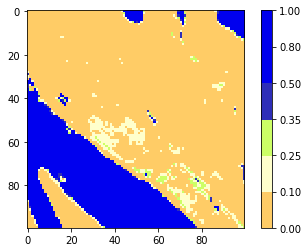

In [26]:
# this could be in the nb_image.py file - plot_ccd_prob
w_cmap = matplotlib.colors.ListedColormap(['#ffcc66','#ffffcc' , '#ccff66' , '#2e2eb8', '#0000ee' , '#0000ee', '#0000ee'])
w_bounds = [0, 0.1, 0.25, 0.35, 0.5, 0.8, 1]
w_norm = matplotlib.colors.BoundaryNorm(w_bounds,w_cmap.N)


ary = water_array
print(ary.shape)

pyplot.imshow(ary, cmap=w_cmap, norm = w_norm)
pyplot.colorbar()
pyplot.show()

Counter = 5 2013-11-24T18:57:38.942422000


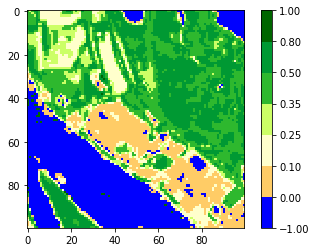

In [27]:
# plot ndvi 
itime = 5
ary = ndvi[itime]
print('Counter = %s %s' % (itime,dataset.time[itime].values))
pyplot.imshow(ary, cmap=ndvi_cmap, norm = ndvi_norm)
pyplot.colorbar()
pyplot.show()
########  ######  SINGLE NDVI versus aggregate water probability from pyccd ##################################

In [28]:
!date

Mon Nov 19 16:39:53 UTC 2018


# The End!